In [1]:
import pandas as pd

# definindo o nome das colunas
column_names = [
    'sepal_length', 
    'sepal_width', 
    'petal_length', 
    'petal_width', 
    'class'
]

# carregando os arquivos .data
df_iris = pd.read_csv('../data/raw/iris.data', header=None, names=column_names)

print("Amostra dos dados:")
display(df_iris.head())

Amostra dos dados:


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
print("--- Informações Gerais e Verificação de Nulos (T1) ---")
df_iris.info()

print("\nValores Nulos (Limpeza T2):")
# esse dataset nao tem nenhum dado faltante, entao nao precisa limpar
print(df_iris.isnull().sum())

--- Informações Gerais e Verificação de Nulos (T1) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Valores Nulos (Limpeza T2):
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [3]:
# bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# configurando o estilo padrao no tema whitegrid
sns.set_theme(style="whitegrid")

In [4]:
print("--- Resumo Estatístico (Análise Univariada) ---")
# o .describe() nos dá média (mean), desvio padrão (std), mediana (50%), min e max.
display(df_iris.describe())

print("\n--- Moda (Valor mais comum) para a Classe ---")
# a moda é útil para colunas categóricas
print(f"Moda da coluna 'class': {df_iris['class'].mode()[0]}")

--- Resumo Estatístico (Análise Univariada) ---


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



--- Moda (Valor mais comum) para a Classe ---
Moda da coluna 'class': Iris-setosa


--- Histogramas (Distribuição de cada variável numérica) ---


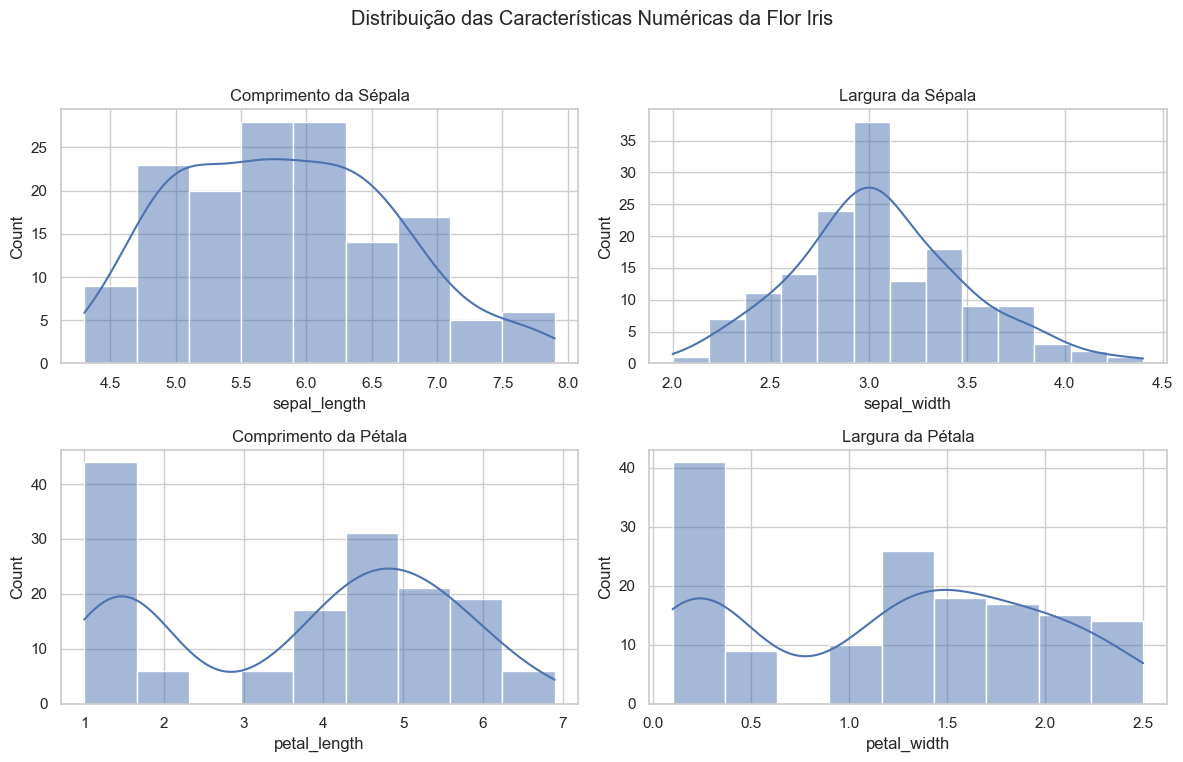

In [5]:
print("--- Histogramas (Distribuição de cada variável numérica) ---")

# criando uma figura com 4 subplots (2 linhas, 2 colunas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribuição das Características Numéricas da Flor Iris')

# kde=True desenha a linha de estimativa de densidade
sns.histplot(df_iris['sepal_length'], kde=True, ax=axes[0, 0]).set_title('Comprimento da Sépala')
sns.histplot(df_iris['sepal_width'], kde=True, ax=axes[0, 1]).set_title('Largura da Sépala')
sns.histplot(df_iris['petal_length'], kde=True, ax=axes[1, 0]).set_title('Comprimento da Pétala')
sns.histplot(df_iris['petal_width'], kde=True, ax=axes[1, 1]).set_title('Largura da Pétala')

# ajustando o layout para evitar sobreposição dos titulos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

--- Box Plots (Comparando características pela Classe) ---


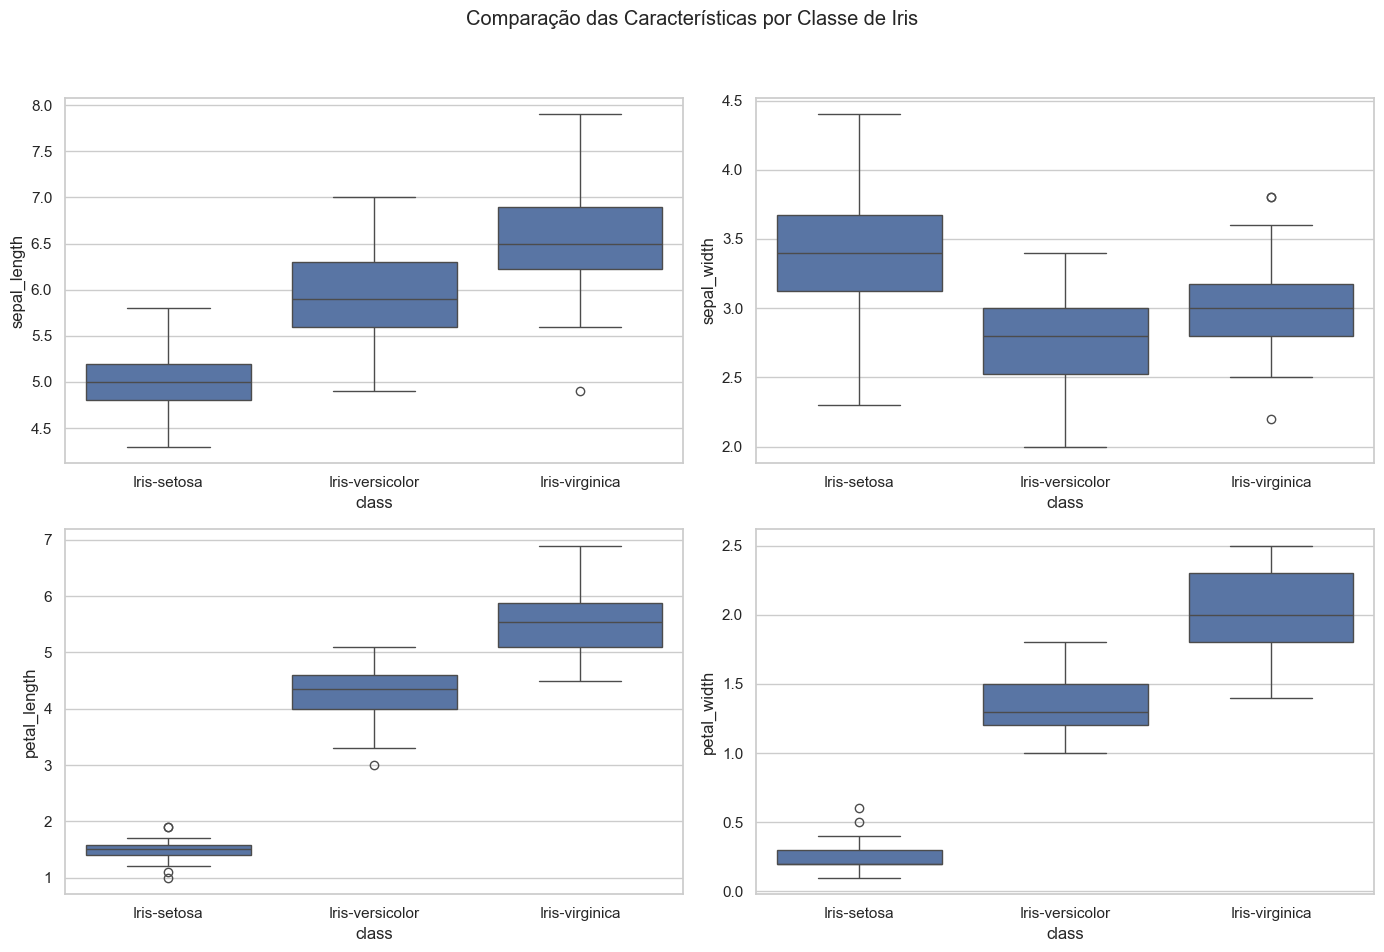

In [6]:
print("--- Box Plots (Comparando características pela Classe) ---")
# Box plots são excelentes para comparar uma variável numérica (y) contra uma categórica (x)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparação das Características por Classe de Iris')

sns.boxplot(ax=axes[0, 0], x='class', y='sepal_length', data=df_iris)
sns.boxplot(ax=axes[0, 1], x='class', y='sepal_width', data=df_iris)
sns.boxplot(ax=axes[1, 0], x='class', y='petal_length', data=df_iris)
sns.boxplot(ax=axes[1, 1], x='class', y='petal_width', data=df_iris)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

--- Matriz de Correlação (Heatmap) ---


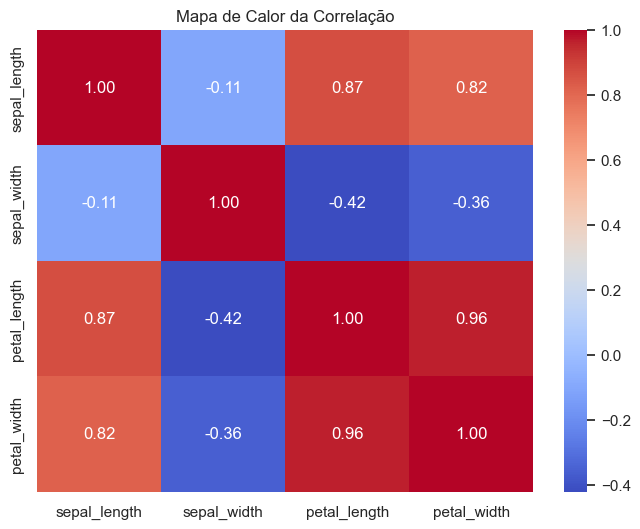

In [7]:
print("--- Matriz de Correlação (Heatmap) ---")
# a correlação mede a relação linear entre -1 e 1

# selecionando apenas colunas numéricas para o cálculo
corr_matrix = df_iris.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(8, 6))
# annot=True mostra os números dentro de cada quadrado
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor da Correlação')
plt.show()

--- Gráfico de Dispersão (Pair Plot) ---


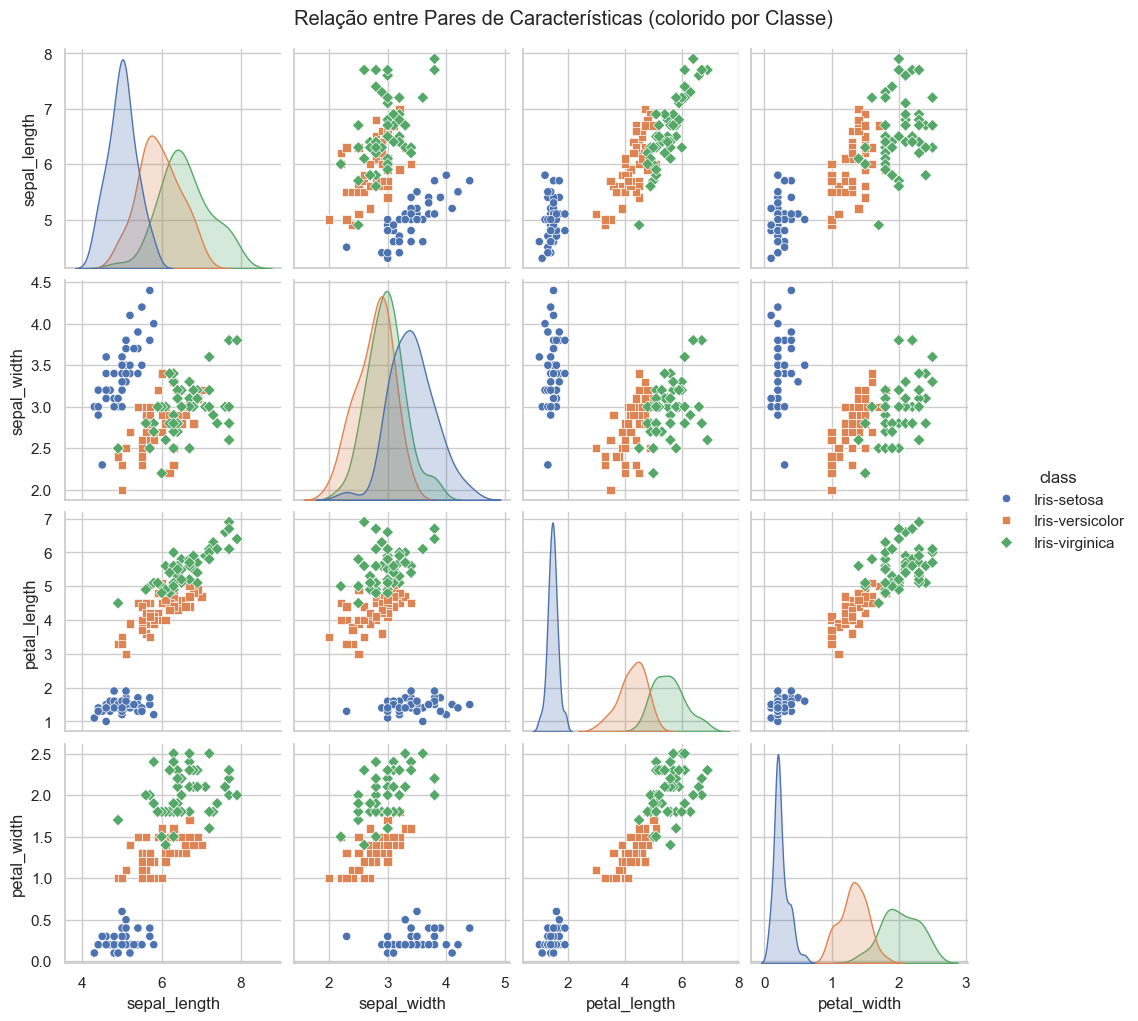

In [8]:
print("--- Gráfico de Dispersão (Pair Plot) ---")
# O pairplot é o melhor gráfico para ver a relação entre todos os pares de variáveis
# 'hue' colore os pontos de acordo com a coluna 'class'

sns.pairplot(df_iris, hue='class', markers=["o", "s", "D"])
plt.suptitle("Relação entre Pares de Características (colorido por Classe)", y=1.02)
plt.show()

É possível separar a espécie 'Iris-setosa' das outras usando apenas as medidas da pétala?
        
Sim, observando o gráfico "Pair Plot" (célula anterior), podemos ver que a 'Iris-setosa' forma um grupo completamente isolado e distante das outras duas espécies quando olhamos petal_length (comprimento) e petal_width (largura). Suas pétalas são visivelmente menores

Qual característica numérica tem a maior correlação com o petal_length (comprimento da pétala)?
        
De acordo com o "Mapa de Calor da Correlação", a petal_width (largura da pétala) tem a correlação mais forte, com um valor de 0.96. Isso indica que a medida que o comprimento da pétala aumenta, a largura da pétala quase sempre aumenta junto